This Jupyter Notebook calculates the FRC between two 2D images. 
The basic requirement is for the images to be ${squared}$, regardless of the size.
The first cell loads the libraries needed for the computation.

In [32]:
import sys
import imageio
import numpy as np
import secondary_utils as su
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy.fft as fft
import matplotlib.font_manager as font_manager
from scipy.interpolate import interp1d
from skimage.filters import window
#from astropy.io import fits

Two important functions:
- openimage (quite self-explanatory)
- rings: generates the array of indices to be used to calculate the FRC. Through analytic shape it returns the coordinates of the pixels within the rings.

In [18]:
def openimage(path): 
    return(imageio.imread(path))


def rings(x):

    shape = np.shape(x)     
    nr,nc = shape
    nrdc = np.floor(nr/2)
    ncdc = np.floor(nc/2)
    r = np.arange(nr)-nrdc 
    c = np.arange(nc)-ncdc  
    [R,C] = np.meshgrid(r,c)
    index = np.round(np.sqrt(R**2+C**2))
    indexf = np.floor(np.sqrt(R**2+C**2))
    indexC = np.ceil(np.sqrt(R**2+C**2))
    print(np.shape(index))
    maxindex = nr/2

    output = np.zeros(int(maxindex),dtype = complex)

    print('performed by index method')
    indices = []
    indicesf, indicesC = [], []
    for i in np.arange(int(maxindex)):
        indicesf.append(np.where(indexf == i))
        indicesC.append(np.where(indexC == i))

    for i in np.arange(int(maxindex)):
        output[i] = (sum(x[indicesf[i]])+sum(x[indicesC[i]]))/2
    return output

The two following functions are the core: 
- apply_hanning_2d to apply the hanning window to the Fourier transformed images in order to reduce the noise
- FRC: Calculates the Fourier Ring Correlation through the formula: 
\begin{equation}\text{FRC}_{12}(r_{i})=\frac{\underset{r\epsilon r_{i}}{\sum}F_{1}(r)\cdot F_{2}(r)^{*}}{\sqrt{\underset{r\epsilon r_{i}}{\sum}|F_{1}|^{2}(r)\cdot\underset{r\epsilon r_{i}}{\sum}|F_{2}|^{2}(r)}}\end{equation}

In [19]:
def apply_hanning_2d(img):
    
    wimage = img * window('hann', img.shape)
    
    print("Hann applied")
    return(wimage)

def FRC(i1, i2,hanning):

    ''' Performing the fourier transform of input
    images to determine the FRC
    '''
    I1 = fft.fftshift(fft.fft2(i1))
    I2 = fft.fftshift(fft.fft2(i2))

    if hanning==True:
        I1 = apply_hanning_2d(I1)
        I2 = apply_hanning_2d(I2)

    C  = rings(I1*np.conjugate(I2))
    C = np.real(C)
    C1 = rings(np.abs(I1)**2)
    C2 = rings(np.abs(I2)**2)
    C  = C.astype(np.float64)
    C1 = np.real(C1).astype(np.float64)
    C2 = np.real(C2).astype(np.float64)
    FSC    = abs(C)/np.sqrt(C1*C2)
    x_fsc  = np.arange(np.shape(C)[0])/(np.shape(i1)[0]/2)
    r      = np.arange(np.shape(i1)[0]/2) # array (0:1:L/2-1)
    n      = 2*np.pi*r # perimeter of r's from above
    n[0]   = 1
    eps    = np.finfo(float).eps
    #t1 = np.divide(np.ones(np.shape(n)),n+eps)
    
    inv_sqrt_n = np.divide(np.ones(np.shape(n)),np.sqrt(n)) # 1/sqrt(n)
    x_T    = r/(np.shape(i1)[0]/2)
    #one bit
    T1 = (0.5+2.4142*inv_sqrt_n)/(1.5+1.4142*inv_sqrt_n)
    #half bit
    T2 = (0.4142+2.287*inv_sqrt_n)/ (1.4142+1.287*inv_sqrt_n)

    return (x_fsc, FSC, x_T, T1,T2)

def gauss_noise(image, mean=0, var=0.001):

    '''
                 Add Gaussian noise
                 mean: mean value
                 var: variance
    '''
    
    image = np.array(image, dtype=float)
    noise = np.random.normal(mean, var ** 0.5, image.shape)
    out = image + noise
    if out.min() < 0:
        low_clip = -1.
    else:
        low_clip = 0.
    out = np.clip(out, low_clip, 1.0)
    out = np.uint8(out*255)

    return out

#lena  = su.imageio_imread('./demo_images/514/Result of Siemens0.jpg')
lena  = su.imageio_imread('./demo_images/barques.jpg')
lena  = lena[:, :,0]
lena  = lena[750:1250,1500:2000]
print(np.max(lena))
lena  = lena.astype(float)
lena  = su.normalize_data_ab(0, 1, lena)

244


Calculate the FRC and the threshold curve through the half-bit formula

In [7]:
xf, frc, x_T, T1,T2 = FRC(Image1, Image2,hanning=False)

(500, 500)
performed by index method
(500, 500)
performed by index method
(500, 500)
performed by index method


Plot everything! 

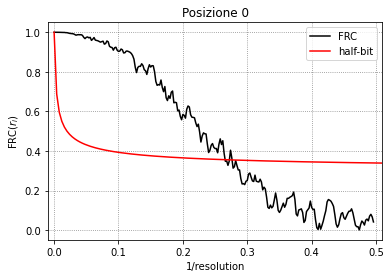

In [10]:
plt.xlim(-0.01, 0.51)
plt.plot(xf[:-1]/2, frc[:-1], label = 'FRC', color='black')
#plt.plot(x_T[:-1], T1[:-1], label = 'one-bit', color='blue')
plt.plot(x_T[:-1], T2[:-1], label = 'half-bit', color='red')
plt.xticks(np.arange(0, 0.6, step=0.1))
plt.grid(linestyle='dotted', color='black', alpha=0.5) 
plt.ylabel("FRC($r_i$)")
plt.xlabel("1/resolution")
plt.title('Posizione 0')
plt.legend()
plt.show()

(500, 500)
performed by index method
(500, 500)
performed by index method
(500, 500)
performed by index method
(500, 500)
performed by index method
(500, 500)
performed by index method
(500, 500)
performed by index method
(500, 500)
performed by index method
(500, 500)
performed by index method
(500, 500)
performed by index method
(500, 500)
performed by index method
(500, 500)
performed by index method
(500, 500)
performed by index method


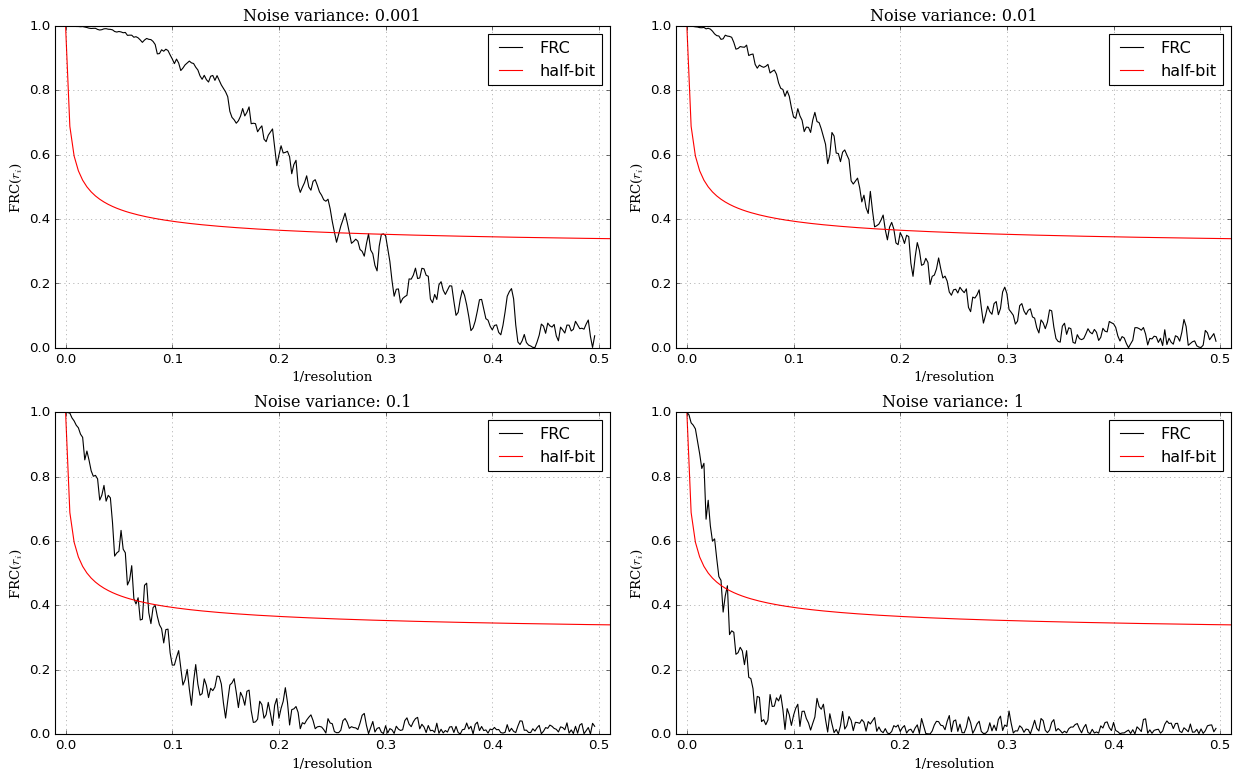

(500, 500)
performed by index method
(500, 500)
performed by index method
(500, 500)
performed by index method


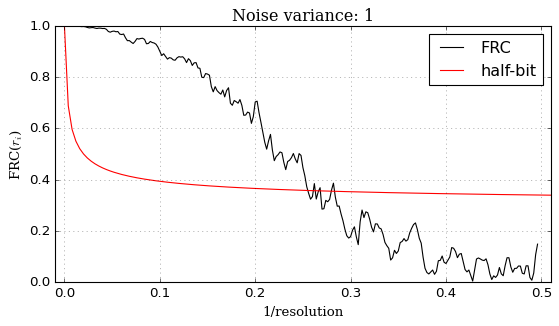

In [34]:
'''
Image1 = gauss_noise(lena,0,0.001)
Image2 = gauss_noise(lena,0,0.001)
f, axrr = plt.subplots(1, 2)
axrr[0].imshow(Image1, cmap='Greys_r')
axrr[0].set_title('Measurement 1')
axrr[1].imshow(Image2, cmap='Greys_r')
axrr[1].set_title('Measurement 2')
plt.show()
xf, frc, x_T, T1,T2 = FRC(Image1, Image2,hanning=False)
plt.xlim(-0.01, 0.51)
plt.plot(xf[:-1]/2, frc[:-1], label = 'FRC', color='black')
plt.plot(x_T[:-1], T1[:-1], label = 'one-bit', color='blue')
plt.plot(x_T[:-1], T2[:-1], label = 'half-bit', color='red')
plt.xticks(np.arange(0, 0.6, step=0.1))
plt.grid(linestyle='dotted', color='black', alpha=0.5) 
plt.ylabel("FRC($r_i$)")
plt.xlabel("1/resolution")
plt.title('Posizione 0')
plt.legend()
plt.show()
'''
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
fig.subplots_adjust(left=0.01, bottom=0.06, right=0.99, top=0.65, wspace=0.12)
plt.rcParams["font.family"] = "serif"
plt.style.use('classic')
font = font_manager.FontProperties(family='serif', size=14)
fig.patch.set_facecolor('white')
coordinates = [(0,0),(0,1),(1,0),(1,1)]
variation = [0.001,0.01,0.1,1]
for i in range(4):
    Image1 = gauss_noise(lena,0,variation[i])
    Image2 = gauss_noise(lena,0,variation[i])
    xf, frc, x_T, T1,T2 = FRC(Image1, Image2,hanning=False)
    axs[coordinates[i]].plot(xf[:-1]/2, frc[:-1], label = 'FRC', color='black')
    axs[coordinates[i]].plot(x_T[:-1], T2[:-1], label = 'half-bit', color='red')
    axs[coordinates[i]].set_xlim(-0.01, 0.51)
    axs[coordinates[i]].set_xticks(np.arange(0, 0.6, step=0.1))
    axs[coordinates[i]].grid(linestyle='dotted', color='black', alpha=0.5) 
    axs[coordinates[i]].set_ylabel("FRC($r_i$)",fontname="serif")
    axs[coordinates[i]].set_xlabel("1/resolution",fontname="serif")
    axs[coordinates[i]].set_title('Noise variance: '+str(variation[i]),fontname="serif")
    axs[coordinates[i]].legend()
file_path = "/Users/oriolsansplanell/Dropbox/Aplicaciones/Overleaf/Thesis/Figures/Fourier/"
file_name = "4-example-frc"
plt.savefig(file_path+file_name+".pdf", bbox_inches='tight')
plt.show()

fig=figure(figsize=(8,4))
plt.rcParams["font.family"] = "serif"
plt.style.use('classic')
font = font_manager.FontProperties(family='serif', size=12)
fig.patch.set_facecolor('white')
Image1 = gauss_noise(lena,0,0.001)
Image2 = gauss_noise(lena,0,0.001)
xf, frc, x_T, T1,T2 = FRC(Image1, Image2,hanning=False)
plt.plot(xf[:-1]/2, frc[:-1], label = 'FRC', color='black')
plt.plot(x_T[:-1], T2[:-1], label = 'half-bit', color='red')
plt.xlim(-0.01, 0.51)
plt.xticks(np.arange(0, 0.6, step=0.1))
plt.grid(linestyle='dotted', color='black', alpha=0.5) 
plt.ylabel("FRC($r_i$)",fontname="serif")
plt.xlabel("1/resolution",fontname="serif")
plt.title('Noise variance: '+str(variation[i]),fontname="serif")
plt.legend()
file_path = "/Users/oriolsansplanell/Dropbox/Aplicaciones/Overleaf/Thesis/Figures/Fourier/"
file_name = "FRC-T"
plt.savefig(file_path+file_name+".pdf", bbox_inches='tight')
plt.show()

(330, 330)
performed by index method
(330, 330)
performed by index method
(330, 330)
performed by index method


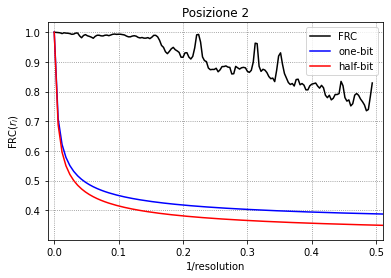

(340, 340)
performed by index method
(340, 340)
performed by index method
(340, 340)
performed by index method


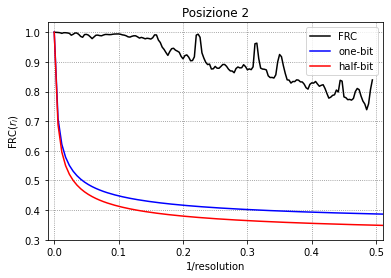

(350, 350)
performed by index method
(350, 350)
performed by index method
(350, 350)
performed by index method


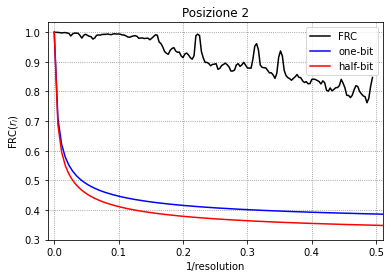

(360, 360)
performed by index method
(360, 360)
performed by index method
(360, 360)
performed by index method


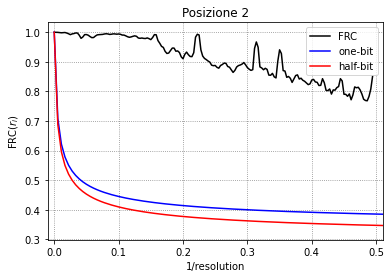

(370, 370)
performed by index method
(370, 370)
performed by index method
(370, 370)
performed by index method


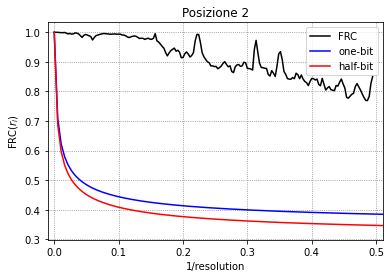

(380, 380)
performed by index method
(380, 380)
performed by index method
(380, 380)
performed by index method


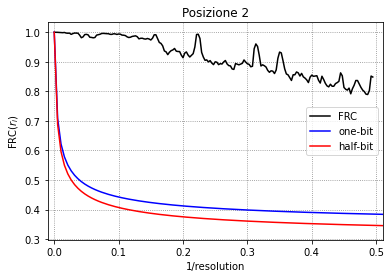

(390, 390)
performed by index method
(390, 390)
performed by index method
(390, 390)
performed by index method


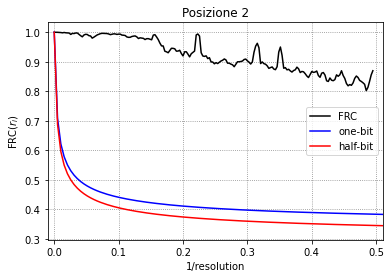

(400, 400)
performed by index method
(400, 400)
performed by index method
(400, 400)
performed by index method


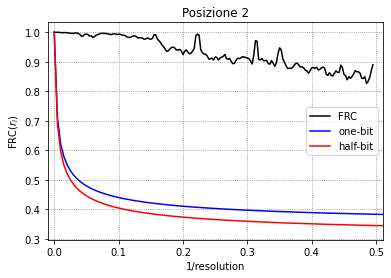

(410, 410)
performed by index method
(410, 410)
performed by index method
(410, 410)
performed by index method


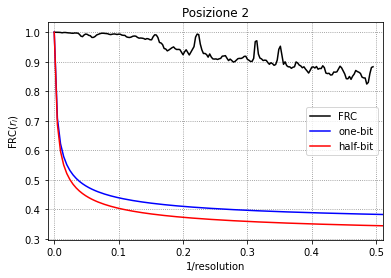

(420, 420)
performed by index method
(420, 420)
performed by index method
(420, 420)
performed by index method


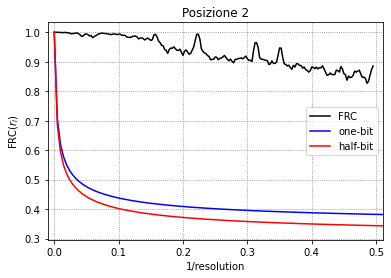

(430, 430)
performed by index method
(430, 430)
performed by index method
(430, 430)
performed by index method


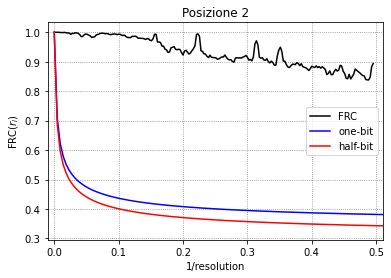

(440, 440)
performed by index method
(440, 440)
performed by index method
(440, 440)
performed by index method


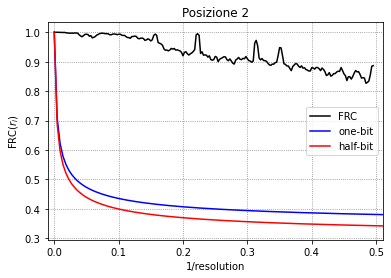

(450, 450)
performed by index method
(450, 450)
performed by index method
(450, 450)
performed by index method


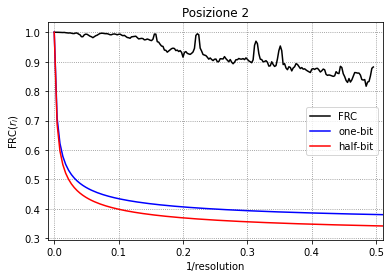

(460, 460)
performed by index method
(460, 460)
performed by index method
(460, 460)
performed by index method


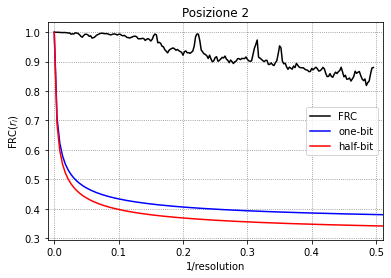

(470, 470)
performed by index method
(470, 470)
performed by index method
(470, 470)
performed by index method


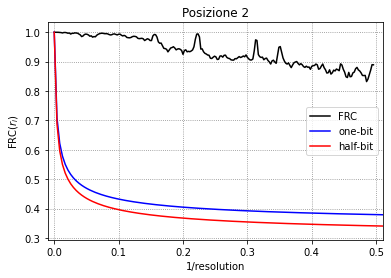

(480, 480)
performed by index method
(480, 480)
performed by index method
(480, 480)
performed by index method


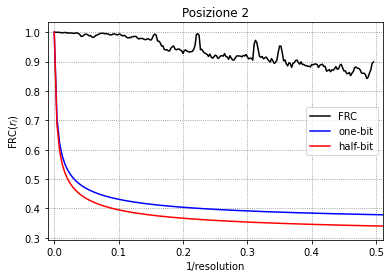

(490, 490)
performed by index method
(490, 490)
performed by index method
(490, 490)
performed by index method


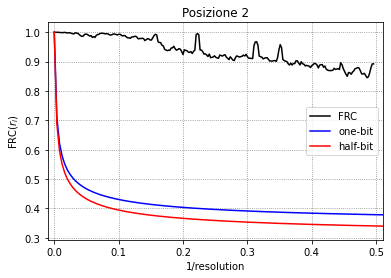

(500, 500)
performed by index method
(500, 500)
performed by index method
(500, 500)
performed by index method


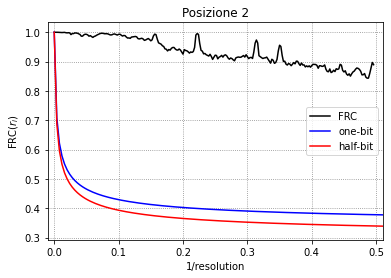

(510, 510)
performed by index method
(510, 510)
performed by index method
(510, 510)
performed by index method


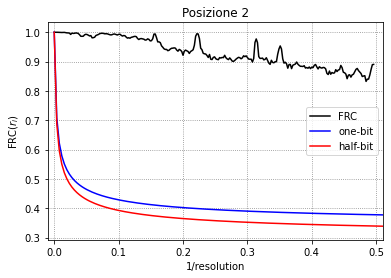

(520, 520)
performed by index method
(520, 520)
performed by index method
(520, 520)
performed by index method


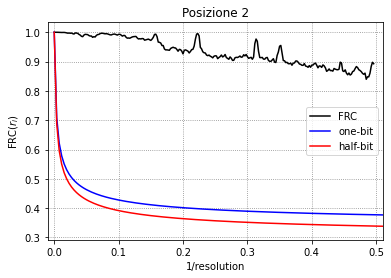

ValueError: Invalid number of FFT data points (0) specified.

In [21]:
for i in range(50):
    Image1 = openimage("Res-pos-0-0.tif")[300:-200+10*i,300:-200+10*i]
    Image2 = openimage("Res-pos-0-1.tif")[300:-200+10*i,300:-200+10*i]
    '''
    f, axrr = plt.subplots(1, 2)
    axrr[0].imshow(Image1, cmap='Greys_r')
    axrr[0].set_title('Measurement 1')
    axrr[1].imshow(Image2, cmap='Greys_r')
    axrr[1].set_title('Measurement 2')
    plt.show()
    '''
    xf, frc, x_T, T1,T2 = FRC(Image1, Image2,hanning=False)
    plt.xlim(-0.01, 0.51)
    plt.plot(xf[:-1]/2, frc[:-1], label = 'FRC', color='black')
    plt.plot(x_T[:-1], T1[:-1], label = 'one-bit', color='blue')
    plt.plot(x_T[:-1], T2[:-1], label = 'half-bit', color='red')
    plt.xticks(np.arange(0, 0.6, step=0.1))
    plt.grid(linestyle='dotted', color='black', alpha=0.5) 
    plt.ylabel("FRC($r_i$)")
    plt.xlabel("1/resolution")
    plt.title('Posizione 2')
    plt.legend()
    plt.show()
    plt.close()

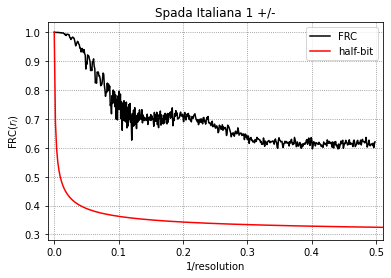

In [93]:
plt.xlim(-0.01, 0.51)
plt.plot(xf[:-1]/2, frc[:-1], label = 'FRC', color='black')
plt.plot(x_T[:-1], T[:-1], label = 'half-bit', color='red')
plt.xticks(np.arange(0, 0.6, step=0.1))
plt.grid(linestyle='dotted', color='black', alpha=0.5) 
plt.ylabel("FRC($r_i$)")
plt.xlabel("1/resolution")
plt.title('Spada Indiana 1 +/-')
plt.legend()
plt.show()

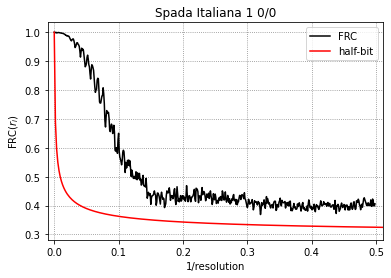

In [96]:
plt.xlim(-0.01, 0.51)
plt.plot(xf[:-1]/2, frc[:-1], label = 'FRC', color='black')
plt.plot(x_T[:-1], T[:-1], label = 'half-bit', color='red')
plt.xticks(np.arange(0, 0.6, step=0.1))
plt.grid(linestyle='dotted', color='black', alpha=0.5) 
plt.ylabel("FRC($r_i$)")
plt.xlabel("1/resolution")
plt.title('Spada Indiana 1 0/0')
plt.legend()
plt.show()

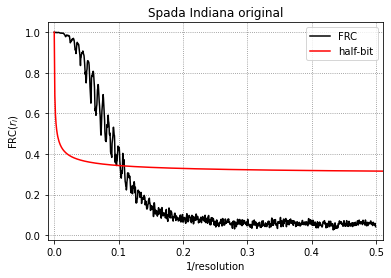

In [99]:
plt.xlim(-0.01, 0.51)
plt.plot(xf[:-1]/2, frc[:-1], label = 'FRC', color='black')
plt.plot(x_T[:-1], T[:-1], label = 'half-bit', color='red')
plt.xticks(np.arange(0, 0.6, step=0.1))
plt.grid(linestyle='dotted', color='black', alpha=0.5) 
plt.ylabel("FRC($r_i$)")
plt.xlabel("1/resolution")
plt.title('Spada Indiana original')
plt.legend()
plt.show()

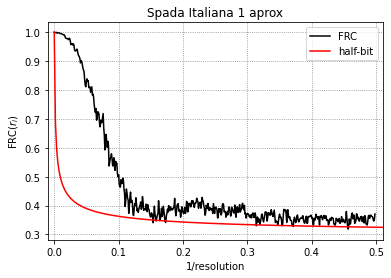

In [102]:
plt.xlim(-0.01, 0.51)
plt.plot(xf[:-1]/2, frc[:-1], label = 'FRC', color='black')
plt.plot(x_T[:-1], T[:-1], label = 'half-bit', color='red')
plt.xticks(np.arange(0, 0.6, step=0.1))
plt.grid(linestyle='dotted', color='black', alpha=0.5) 
plt.ylabel("FRC($r_i$)")
plt.xlabel("1/resolution")
plt.title('Spada Italiana 1 aprox')
plt.legend()
plt.show()